In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the dataset

In [2]:
req = requests.get("..")
req_content = req.content

dataset_csv = open('..', 'wb')
dataset_csv.write(req_content)
dataset_csv.close()

In [3]:
raw_data = pd.read_csv('..')
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Structure & Characteristics of dataset

In [4]:
raw_data.shape

(180, 9)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
raw_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [7]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
raw_data['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [9]:
raw_data['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

**Observations:**
1. Dataset includes 180 rows and 9 columns
2. There are no missing values in the data
3. There are 3 unique products KP281, KP481, KP781 in dataset with KP281 having more sales

## Univariate Analysis

**Distribution of data for quantitative attributes**

<Axes: xlabel='Miles', ylabel='Count'>

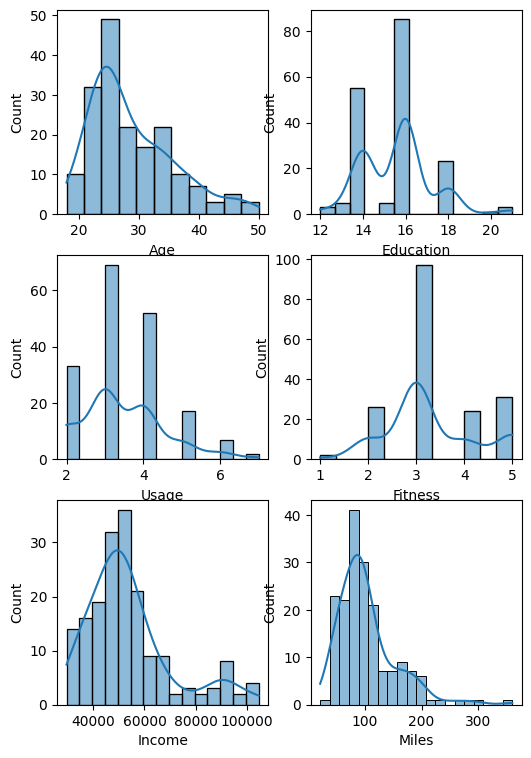

In [10]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6,5))
fig.subplots_adjust(top=1.5)

sns.histplot(data=raw_data, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=raw_data, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=raw_data, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=raw_data, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=raw_data, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=raw_data, x="Miles", kde=True, ax=axis[2,1])

**Distribution of data for qualitative attributes**

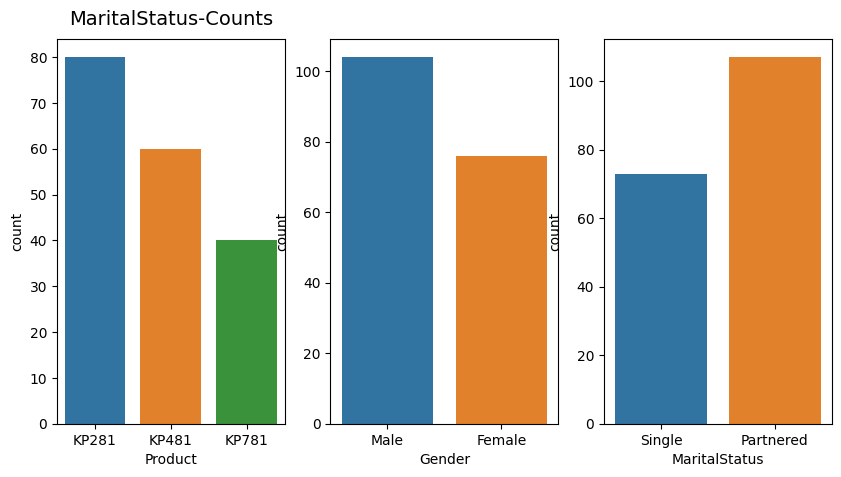

In [11]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

palette_color = sns.color_palette('bright')

sns.countplot(data=raw_data, x="Product", hue="Product", ax=axis[0], legend=False)
sns.countplot(data=raw_data, x="Gender",hue="Gender", ax=axis[1], legend=False)
sns.countplot(data=raw_data, x="MaritalStatus",hue="MaritalStatus", ax=axis[2], legend=False)

axis[0].set_title("Product-Counts", pad=10, fontsize=14)
axis[0].set_title("Gender-Counts", pad=10, fontsize=14)
axis[0].set_title("MaritalStatus-Counts", pad=10, fontsize=14)

plt.show()

**Normalized count for each category of qualitative attributes**

In [12]:
normalized_df = raw_data[['Product', 'Gender', 'MaritalStatus']].melt()
normalized_df.groupby(['variable', 'value'])[['value']].count().div(len(raw_data)).round(decimals=2)

value
variable      value           
Gender        Female      0.42
              Male        0.58
MaritalStatus Partnered   0.59
              Single      0.41
Product       KP281       0.44
              KP481       0.33
              KP781       0.22

**Observations:**
1. KP281 is the most sold product
2. More males in data than females
3. Data shows more married people have bought the product than single ones

## Outliers detection using box plots

<Axes: xlabel='Miles'>

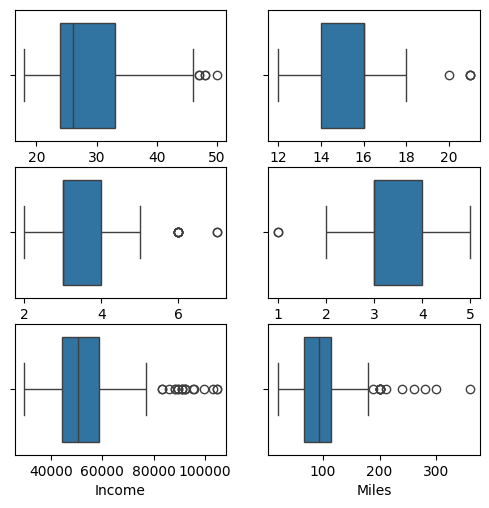

In [13]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6,5))
fig.subplots_adjust(top=1.0)

sns.boxplot(data=raw_data, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=raw_data, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=raw_data, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=raw_data, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=raw_data, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=raw_data, x="Miles", orient='h', ax=axis[2,1])

**Observations:**
1. From box plots it is clear that income and miles have comparatively more outliers than other quantitative attributes

## Bivariate Analysis

**Checking if features - Gender or MaritalStatus have any effect on the product purchased.**

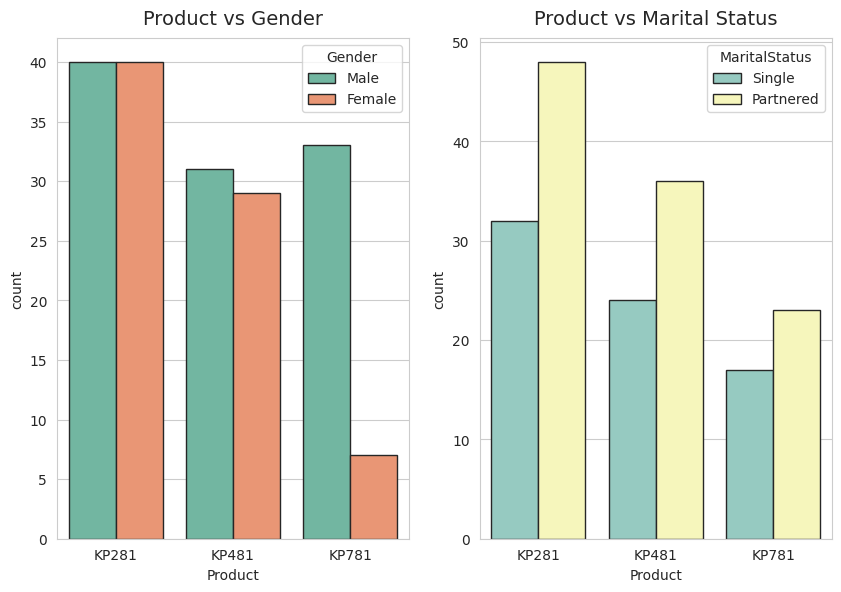

In [14]:
sns.set_style(style="whitegrid")

fix, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=raw_data, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axis[0])
sns.countplot(data=raw_data, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axis[1])

axis[0].set_title("Product vs Gender", pad=10, fontsize=14)
axis[1].set_title("Product vs Marital Status", pad=10, fontsize=14)

plt.show()

**Checking if quantitative attributes have any effect on the product purchased.**

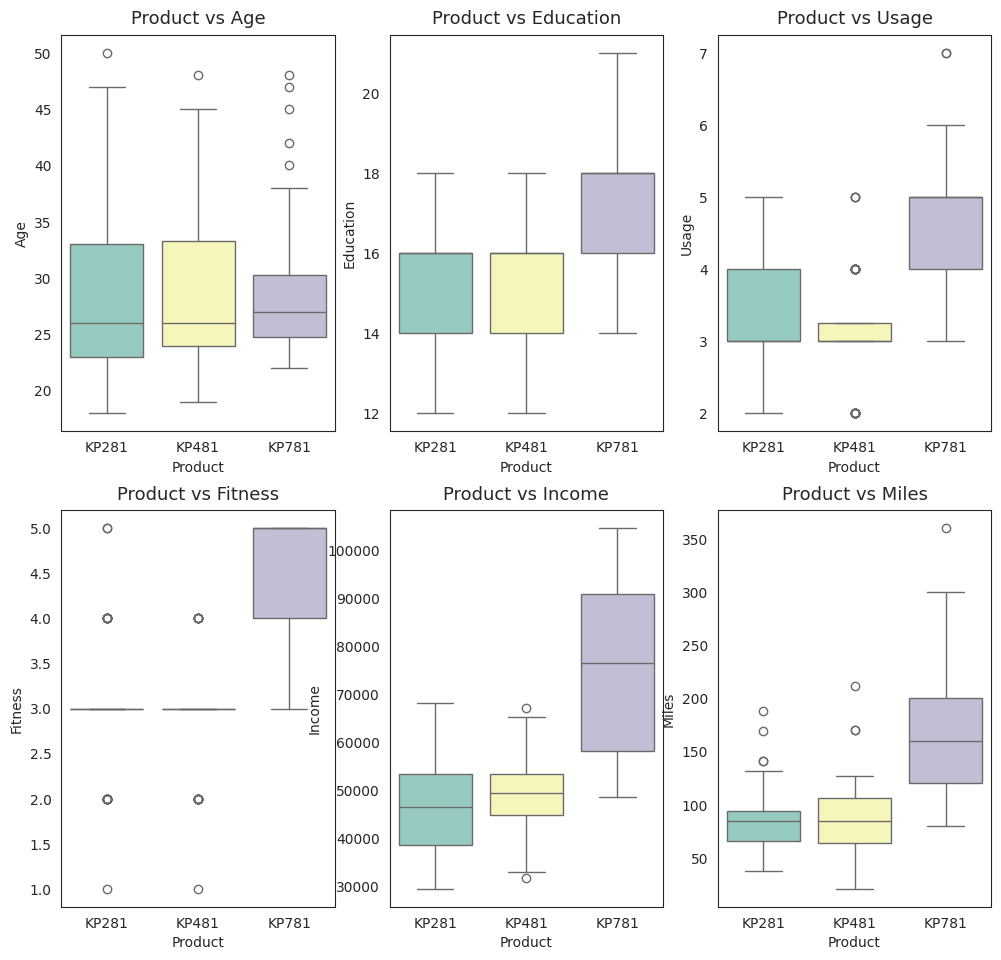

In [15]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
count = 0

for i in range(2):
  for j in range(3):
    sns.boxplot(data=raw_data, x='Product', y=attrs[count], hue='Product', ax=axis[i,j], palette='Set3')
    axis[i,j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
    count += 1

**Observations:**
1. Product KP281 & KP481 share the same age groups and qualifications of people buying it
2. KP781 is preferred by customers willing to use it more than 4 times a week, people with high fitness score and people with high income prefer buying KP781

## Multivariate Analysis

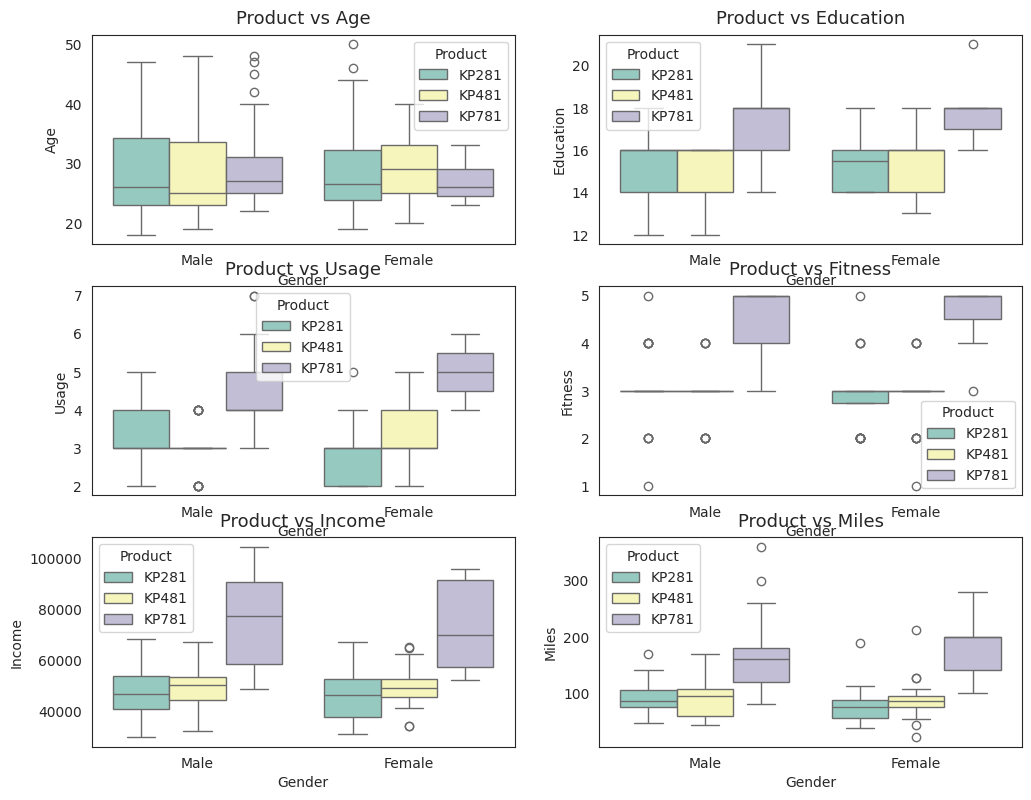

In [16]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1)
count = 0

for i in range(3):
  for j in range(2):
    sns.boxplot(data=raw_data, x='Gender', y=attrs[count], hue='Product', ax=axis[i,j], palette='Set3')
    axis[i,j].set_title(f"Product vs {attrs[count]}", pad=8, fontsize=13)
    count += 1

**Observations:**
1. KP481 is preferred by women planning to use it 3 to 4 times in a week

## Treating Outliers

**Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).**

In [17]:
clipped_data = raw_data.copy()

num_attr = ['Age', 'Income', 'Miles']

for col in num_attr:
  percentiles = raw_data[col].quantile([0.05,0.95]).values
  clipped_data[col] = np.clip(clipped_data[col], percentiles[0], percentiles[1])

In [18]:
clipped_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.641389,15.572222,3.455556,3.311111,53477.070000,101.088889
std,6.446373,1.617055,1.084797,0.958869,15463.662523,43.364286
min,20.000000,12.000000,2.000000,1.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,21.000000,7.000000,5.000000,90948.250000,200.000000


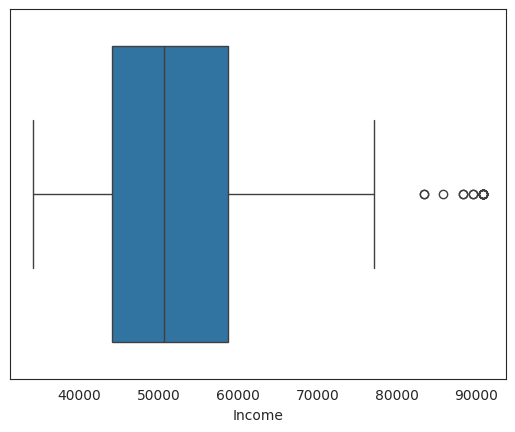

In [19]:
sns.boxplot(data=clipped_data, x="Income", orient='h')
plt.show()

## Marginal & Conditional probablity for identifying customer persona

In [27]:
# Creating bins on intervals of 5 as age gaps and below 20, above 40 -

bins = [-1,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
raw_data['Age_bins'] = pd.cut(raw_data['Age'], bins=bins, labels=labels)
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,18-20,<20
1,KP281,19,Male,15,Single,2,3,31836,75,18-20,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20,<20
3,KP281,19,Male,12,Single,3,3,32973,85,18-20,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-20,<20


In [28]:
# Creating bins for income -

bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
raw_data['Income_bins'] = pd.cut(raw_data['Income'], bins=bins, labels=labels)
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,18-20,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,18-20,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,18-20,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-20,<20,35000-45000


In [29]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
raw_data['Mile_bins'] = pd.cut(raw_data['Miles'], bins=bins, labels=labels)
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Age_bins,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,18-20,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,18-20,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-20,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,18-20,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-20,<20,35000-45000,<50


In [30]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']

In [31]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(raw_data[i], raw_data['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


## Summary

**KP281**

1. 52% of 76 females & 38% of 104 males buy KP281
2. 80% of 5 people having 15 years of education buy KP281
3. 44% of 73 single persons and 45% of 107 partnered persons buy KP281
4. 58%, 53%, 42% people use product KP281 2,3,4 times a week respectively
5. 50%, 53%, 55% of people having fitness 1,2,3 resp. use product KP281
6. KP281 is used by 60% people having age <20, 50% of people having age in range 25-30 and 35-40+
7. 75% of people who buy KP281 have income in range 35K-45K
8. KP281 is preferred by 70% people who use it for <50 miles a week

**KP481**

1. 38% of 76 females & 29% of 104 males buy KP481
2. 33% of 73 single persons and 34% of 107 partnered persons buy KP481
3. 42%, 45% people use product KP481 2,3 times a week respectively
4. 50%, 46%, 40% of people having fitness 1,2,3 resp. use product KP481
5. KP481 is used by 40% people having age <20, 53% of people having age in range 35-40
6. 41-45% of people who buy KP481 have income in range 45K-60K
7. KP481 is preferred by 34-40% people who use it for 50-150 miles a week

**KP781**

1. 9% of 76 females & 30% of 104 males buy KP781
2. 100% of 5 people having 20 & 21 years of education buy KP781
3. 23% of 73 single persons and 21% of 107 partnered persons buy KP781
4. 100% people use product KP781 6,7 times a week
5. 94% of people having fitness 5 use product KP781
6. KP781 is used by 25-32% people having age in range 20-30, 33% of people having age 40+
7. 100% of people who buy KP781 have income >70K
8. KP781 is preferred by 82% people who use it for more than 150 miles a week


